<a href="https://colab.research.google.com/github/dinumarish/machine-learning-models-and-evaluators/blob/main/Natural%20Language%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
sns.set()
pd.set_option('display.max_columns',500)

In [116]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [117]:
from nltk.book import *

In [118]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [119]:
text1,len(set(text1))
with open('mobidick.txt','w') as fhand:
  for line in text1:
    fhand.write(line)
  

In [120]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [121]:
sent1

['Call', 'me', 'Ishmael', '.']

In [122]:
text7

<Text: Wall Street Journal>

In [123]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [124]:
len(sent7)

18

In [125]:
len(text7),len(set(text7))

(100676, 12408)

In [126]:
dist = FreqDist(text7)
print(len(dist))
list(dist.keys())[:10]

12408


['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

In [127]:
freqwords = [word for word in dist.keys() if dist[word]>100 and len(word)>5]
freqwords[:10]

['billion',
 'company',
 'president',
 'because',
 'market',
 'million',
 'shares',
 'trading',
 'program']

In [128]:
freqworddist = {w:dist[w] for w in freqwords}
freqworddist

{'billion': 159,
 'company': 260,
 'president': 133,
 'because': 118,
 'market': 176,
 'million': 383,
 'shares': 114,
 'trading': 162,
 'program': 127}

In [129]:
dict(sorted(freqworddist.items(),key=lambda x:x[1],reverse=True))

{'million': 383,
 'company': 260,
 'market': 176,
 'trading': 162,
 'billion': 159,
 'president': 133,
 'program': 127,
 'because': 118,
 'shares': 114}

In [130]:

tokens = nltk.word_tokenize(' '.join(text7))
porter = nltk.PorterStemmer()
wordlist = ' '.join(text7).split(' ')
stems  = [porter.stem(word) for word in wordlist[:20]]


In [131]:
len(text7),len(set(text7)),len(tokens),len(stems),len(set(stems))

(100676, 12408, 109790, 20, 18)

In [132]:
list(set(stems))[:10]

['nov.', 'old', '61', 'nonexecut', 'as', 'board', 'mr.', ',', 'join', 'pierr']

In [133]:
lemma  = nltk.WordNetLemmatizer()
lemats = [lemma.lemmatize(word) for word in wordlist[:20]]
lemats[:20]

['Pierre',
 'Vinken',
 ',',
 '61',
 'year',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'a',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.',
 'Mr.',
 'Vinken']

In [134]:
FreqDist(wordlist)

FreqDist({',': 4885, 'the': 4045, '.': 3828, 'of': 2319, 'to': 2164, 'a': 1878, 'in': 1572, 'and': 1511, '*-1': 1123, '0': 1099, ...})

In [136]:
sentences = nltk.sent_tokenize(' '.join(text7))
sentences[:3]

['Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .',
 'Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group .',
 'Rudolph Agnew , 55 years old and former chairman of Consolidated Gold Fields PLC , was named *-1 a nonexecutive director of this British industrial conglomerate .']

In [137]:
samp = 'the old man the boat'
sentsamp = nltk.word_tokenize(samp)
nltk.pos_tag(sentsamp)

[('the', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

In [138]:
tokens = nltk.word_tokenize(' '.join(text1))
pos = nltk.pos_tag(tokens)
posp = [tag[1] for tag in pos]
posp = FreqDist(posp)
posp = dict(sorted(posp.items(), key=lambda x:x[1], reverse=True))
tt = len(tokens)
posdense = {k:v/tt*100 for k,v in posp.items()}

In [139]:
print(sum(posdense.values()))
pdf = pd.DataFrame(posdense, index =['percent']).T
pdf = pdf.reset_index()
pdf.head()

100.0


,index,percent
0,NN,13.538372
1,IN,10.971280
2,DT,9.824063
3,",",7.302161
4,JJ,6.821021


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

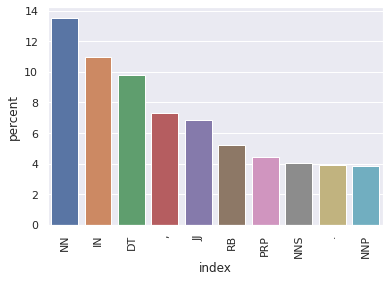

In [140]:

ax = sns.barplot(data=pdf.iloc[:10,:],x='index',y='percent')
plt.xticks(rotation=90)


In [141]:
samp = 'I saw the man with a telescope'
sampwords = nltk.word_tokenize(samp)
#grammar = nltk.data.load('mygrammar1.cfg')
grammar = nltk.CFG.fromstring("""S -> NP VP 
VP -> V NP | VP PP
PP -> P NP
NP -> DT N | DT N PP | 'I'
DT -> 'a' | 'the'
N -> 'man' | 'telescope' 
V -> 'saw'
P -> 'with'
""")
parser = nltk.ChartParser(grammar)
trees = parser.parse_all(sampwords)
for tree in trees:
  print(tree)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (DT the) (N man)))
    (PP (P with) (NP (DT a) (N telescope)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (DT the) (N man) (PP (P with) (NP (DT a) (N telescope))))))


In [142]:
from nltk.corpus import treebank
text17 = treebank.parsed_sents('wsj_0001.mrg')[0]
print(text17)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


In [143]:
reviews = list(filter(lambda x: 'reviews' in x.lower(), os.listdir(nltk.data.find('corpora'))))
reviews

['product_reviews_2.zip',
 'product_reviews_2',
 'movie_reviews',
 'movie_reviews.zip',
 'product_reviews_1',
 'product_reviews_1.zip']

In [145]:


def extract_zip(file_name):  
  # importing required modules
  from zipfile import ZipFile

  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')




# specifying the zip file name


In [146]:
nltk.corpus.product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

In [147]:

movs = nltk.corpus.movie_reviews.fileids()
mr = nltk.corpus.movie_reviews.open('neg/cv000_29416.txt')

rev = ''
for line in mr:
  rev = rev + line.strip()
#rev = str(rev)
rev

'plot : two teen couples go to a church party , drink and then drive .they get into an accident .one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .what\'s the deal ?watch the movie and " sorta " find out . . .critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly .they seem to have taken this pretty neat concept , but executed it terribly .so what are the problems with the movie ?well , its main problem is that it\'s simply too jumbled .it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what\'s going

In [91]:
len(set(nltk.word_tokenize(rev)))

364

In [99]:
lemma.lemmatize('giving, given,givable,corpora'), porter.stem('giving, given,givable,corpora')

('giving, given,givable,corpora', 'giving, given,givable,corpora')

In [157]:
from nltk.corpus import movie_reviews  
print(movie_reviews.categories())
pos = movie_reviews.fileids('pos')
neg = movie_reviews.fileids('neg')

rev_list =[]


for entry in [pos,neg]:
  for review in entry:
    revword = nltk.corpus.movie_reviews.words(review)
    rev = ' '.join(revword)
    rev = rev.replace(' ,',',')
    rev = rev.replace(' .','.')
    rev = rev.replace(" \'","'")
    rev = rev.replace("\' ","'")
    rev_list.append(rev)
len(rev_list)


['neg', 'pos']


2000

In [239]:
from sklearn.model_selection import train_test_split
revdf = pd.DataFrame({'review':rev_list, 'target':[0]*1000 + [1]*1000})
X = revdf['review'].values
y = revdf['target'].values

X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=2022, test_size=0.10)
vect = CountVectorizer(stop_words='english',lowercase=True, min_df=5)
X_train_count_vect = vect.fit_transform(X_train)
X_train_count_vect.shape

(1800, 12156)

In [240]:
featuredf = pd.DataFrame(X_train_count_vect.toarray(),columns = vect.get_feature_names_out())
featuredf.shape
featuredf.head(3)

,00,000,007,10,100,1000,101,102,105,11,12,13,137,13th,14,15,150,16,17,17th,18,180,18th,19,1900,1912,1939,1940,1947,1950,1950s,1954,1960,1960s,1962,1963,1966,1967,1968,1969,1970,1970s,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1980s,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1990s,1991,1992,1993,1994,1995,1996,1997,1998,1999,19th,20,200,2000,2001,20th,21,22,23,24,25,25th,26,27,28,29,30,300,3000,31,33,35,37,40,400,45,48,4th,50,500,50s,54,57,60,60s,70,70s,75,80,80s,85,8mm,90,90210,90s,92,94,95,96,97,98,99,_is_,_not_,_really_,_the,aaron,abandon,abandoned,abandons,abby,abduction,abel,abilities,ability,able,ably,aboard,abode,abortion,abound,abraham,abrahams,abrasive,abrupt,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,abstract,absurd,absurdity,absurdly,abundance,abundant,abundantly,abuse,abused,abusive,abysmal,abyss,academic,academy,accent,accents,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessible,accident,accidental,accidentally,accidents,acclaim,acclaimed,accolades,accompanied,accompanies,accompaniment,accompany,accompanying,accomplice,accomplish,accomplished,accomplishes,accomplishment,accomplishments,according,accordingly,account,accountant,accounts,accuracy,accurate,accurately,accusation,accused,accuses,accustomed,ace,acerbic,achieve,achieved,achievement,achievements,achieves,achieving,achingly,acid,acknowledge,acquaintances,acquired,acrobatics,act,acted,acting,action,actions,active,actively,activist,activities,activity,actor,actors,actress,actresses,acts,actual,actuality,actually,acutely,ad,adage,adam,adams,adaptation,adaptations,adapted,...,whine,whining,whiny,whip,whipped,whirlwind,whiskey,whisper,whit,whitaker,white,whites,whitney,whiz,whoa,whodunit,wholeheartedly,wholesome,wholly,whomever,whoopi,whoops,whore,wicked,wickedly,wide,widely,wider,widescreen,widespread,widow,widowed,widower,wielding,wife,wig,wilcock,wild,wilde,wilder,wildlife,wildly,wilkinson,willed,willem,william,williams,williamson,willie,willing,willingness,willis,willy,wilson,wimp,win,wince,wincott,wind,winded,window,windows,winds,windsor,wine,wing,wings,wink,winkler,winner,winners,winning,winona,wins,winslet,winter,wipe,wiped,wire,wires,wisdom,wise,wisecracking,wisecracks,wiseguy,wisely,wish,wished,wishes,wishing,wistful,wit,witch,witchcraft,witches,withdrawn,witherspoon,witness,witnessed,witnesses,witnessing,wits,witt,witted,witty,wives,wizard,woefully,wolf,wolfgang,wolves,woman,womanizer,women,won,wonder,wondered,wonderful,wonderfully,wondering,wonderland,wonders,wondrous,wong,woo,wood,wooden,woods,woody,word,words,wore,work,worked,worker,workers,working,workings,works,world,worldly,worlds,worldwide,worm,worn,worried,worry,worrying,worse,worst,worth,worthless,worthwhile,worthy,wouldn,wound,wounded,wounds,woven,wow,wrap,wrapped,wraps,wrath,wreak,wreaking,wreck,wreckage,wrecking,wrenching,wrestling,wretched,wright,write,writer,writers,writes,writing,written,wrong,wrongfully,wrongly,wrongs,wrote,wrought,wry,wunderkind,wwii,www,wyatt,ya,yard,yards,yarn,yawn,yea,yeah,year,yearn,yearning,yearns,years,yell,yelling,yellow,yells,yen,yeoh,yep,yes,yesterday,yields,ying,yoda,york,yorker,yorkers,young,younger,youngest,youngster,youngsters,youth,youthful,youths,yuen,yuks,yun,yup,yuppie,zack,zahn,zane,zany,zellweger,zen,zero,zest,zeta,zingers,zoe,zombie,zombies,zone,zoo,zoom,zooms,zorro,zucker,zwick
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

# Model training

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report


clf = GaussianNB()
clf.fit(X_train_count_vect.toarray(),y_train)
pred_y = clf.predict(vect.transform(X_test).toarray())
confusion_matrix(y_test,pred_y)

array([[71, 30],
       [34, 65]])

In [243]:
print(f"train set score: {clf.score(X_train_count_vect.toarray(),y_train)}")
print(f"test set score: {clf.score(vect.transform(X_test).toarray(),y_test)}")
print(classification_report(y_test,pred_y))

train set score: 0.9611111111111111
test set score: 0.68
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       101
           1       0.68      0.66      0.67        99

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



In [245]:
clf = MultinomialNB().fit(X_train_count_vect.toarray(),y_train)
pred_y = clf.predict(vect.transform(X_test).toarray())
print(f"train set score: {clf.score(X_train_count_vect.toarray(),y_train)}")
print(f"test set score: {clf.score(vect.transform(X_test).toarray(),y_test)}")
print(classification_report(y_test,pred_y))


train set score: 0.9433333333333334
test set score: 0.845
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       101
           1       0.84      0.85      0.84        99

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [246]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000).fit(X_train_count_vect.toarray(),y_train)
pred_y = clf.predict(vect.transform(X_test).toarray())
print(f"train set score: {clf.score(X_train_count_vect.toarray(),y_train)}")
print(f"test set score: {clf.score(vect.transform(X_test).toarray(),y_test)}")
print(classification_report(y_test,pred_y))

train set score: 1.0
test set score: 0.88
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       101
           1       0.89      0.86      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [248]:
features = np.array(vect.get_feature_names_out())
coefs = clf.coef_[0]
print('Least important features \n{}\n'.format(features[coefs.argsort()[:10]]))
print('Most important features \n{}'.format(features[coefs.argsort()[-11:-1]]))

Least important features 
['fun' 'overall' 'great' 'entertaining' 'memorable' 'hilarious'
 'excellent' 'different' 'perfectly' 'definitely']

Most important features 
['script' 'boring' 'plot' 'waste' 'awful' 'reason' 'poor' 'unfortunately'
 'supposed' 'worst']


# Using Tfid Vecotorizer

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(min_df=5)
X_train_tfid_vect = tvec.fit_transform(X_train).toarray()
X_test_tfid_vect = tvec.transform(X_test).toarray()
features = tvec.get_feature_names_out()

clf = LogisticRegression(max_iter=1000).fit(X_train_tfid_vect,y_train)
pred_y = clf.predict(X_test_tfid_vect)
print(f"train set score: {clf.score(X_train_tfid_vect,y_train)}")
print(f"test set score: {clf.score(X_test_tfid_vect,y_test)}")
print(classification_report(y_test,pred_y))

train set score: 0.9466666666666667
test set score: 0.865
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       101
           1       0.87      0.86      0.86        99

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



# Trying with ngrams

In [253]:


tvec = TfidfVectorizer(min_df=5, ngram_range=(1,3))
X_train_tfid_vect = tvec.fit_transform(X_train).toarray()
X_test_tfid_vect = tvec.transform(X_test).toarray()

clf = LogisticRegression(max_iter=1000).fit(X_train_tfid_vect,y_train)
pred_y = clf.predict(X_test_tfid_vect)
print(f"train set score: {clf.score(X_train_tfid_vect,y_train)}")
print(f"test set score: {clf.score(X_test_tfid_vect,y_test)}")
print(classification_report(y_test,pred_y))

features = np.array(tvec.get_feature_names_out())
coefs = clf.coef_[0]
print('Least important features \n{}\n'.format(features[coefs.argsort()[:10]]))
print('Most important features \n{}'.format(features[coefs.argsort()[-11:-1]]))

train set score: 0.9683333333333334
test set score: 0.865
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       101
           1       0.86      0.87      0.86        99

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200

Least important features 
['and' 'is' 'the' 'as' 'life' 'great' 'his' 'very' 'also' 'he is']

Most important features 
['nothing' 'boring' 'no' 'to' 'only' 'this' 'movie' 'have' 'plot' 'worst']


In [255]:


vect = CountVectorizer(min_df=5, ngram_range=(1,2))
X_train_count_vect = vect.fit_transform(X_train).toarray()
X_test_count_vect = vect.transform(X_test).toarray()

clf = LogisticRegression(max_iter=1000).fit(X_train_count_vect,y_train)
pred_y = clf.predict(X_test_count_vect)
print(f"train set score: {clf.score(X_train_count_vect,y_train)}")
print(f"test set score: {clf.score(X_test_count_vect,y_test)}")
print(classification_report(y_test,pred_y))

features = np.array(vect.get_feature_names_out())
coefs = clf.coef_[0]
print('Least important features \n{}\n'.format(features[coefs.argsort()[:10]]))
print('Most important features \n{}'.format(features[coefs.argsort()[-11:-1]]))

train set score: 1.0
test set score: 0.915
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       101
           1       0.91      0.92      0.91        99

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

Least important features 
['fun' 'great' 'well' 'life' 'seen' 'job' 'american' 'back' 'excellent'
 'the two']

Most important features 
['boring' 'any' 'looks' 'plot' 'poor' 'script' 'nothing' 'worst' 'only'
 'unfortunately']
